<a href="https://colab.research.google.com/github/cristinaegus/python_c2b/blob/main/Copia_de_Ejercicios_de_Uniones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unión de Tablas de Datos Meteorológicos

Tienes el excel EstaciónMeteo.xlsx con datos horarios de una estación meteorológica que contienen información sobre temperatura, humedad y presión atmosférica. Las tres tablas tienen las mismas columnas, excepto la segunda tabla, que no contiene datos de presión atmosférica. Une las tres tablas verticalmente.

In [ ]:
import pandas as pd

Cargamos los datos del Excel [Documentación Pandas read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [8]:
import pandas as pd

archivo = "/content/sample_data/EstaciónMeteo.xlsx"
lunes = pd.read_excel(archivo, sheet_name='Lunes')
martes = pd.read_excel(archivo, sheet_name='Martes')
miercoles = pd.read_excel(archivo, sheet_name='Miércoles')

# Combine 'Hora' with a dummy date to create a datetime index for each day
lunes['Fecha y Hora'] = pd.to_datetime('2023-01-01 ' + lunes['Hora'].astype(str))
martes['Fecha y Hora'] = pd.to_datetime('2023-01-02 ' + martes['Hora'].astype(str))
miercoles['Fecha y Hora'] = pd.to_datetime('2023-01-03 ' + miercoles['Hora'].astype(str))

# Set the datetime index
lunes = lunes.set_index('Fecha y Hora')
martes = martes.set_index('Fecha y Hora')
miercoles = miercoles.set_index('Fecha y Hora')

# Drop the original 'Hora' column
lunes = lunes.drop('Hora', axis=1)
martes = martes.drop('Hora', axis=1)
miercoles = miercoles.drop('Hora', axis=1)

In [ ]:
lunes.head()

,Hora,Temperatura (°C),Humedad (%),Presión (hPa)
0,00:00,10.5,65,1013.2
1,01:00,9.8,68,1012.8
2,02:00,9.2,70,1012.5
3,03:00,8.7,72,1012.3
4,04:00,8.3,74,1012.1


<Axes: >

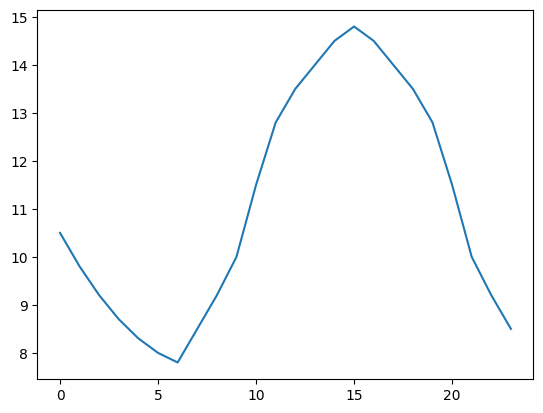

In [ ]:
lunes["Temperatura (°C)"].plot()

Concatenamos las tablas del excel.

In [16]:
# Concatenate the tables vertically
df = pd.concat([lunes,martes,miercoles])

Posteriormente aparece un csv llamado Vientos.csv de datos de velocidad y dirección del viento pero, en este caso, los datos son cada 15 minutos. Busca una estrategia para unir los datos horizontalmente.

In [21]:
import pandas as pd

# Primero, cargamos el archivo Vientos.csv
vientos_df = pd.read_csv('/content/sample_data/Vientos.csv', decimal=',')

# Combine 'Día' and 'Hora' to create a datetime index for the wind data
# Assuming the 'Día' column in Vientos.csv corresponds to the same days as the excel data (1 for Lunes, 2 for Martes, 3 for Miércoles)
# We also need to ensure the date format is correct.
# Assuming Day 1 in Vientos.csv is the same date as Lunes (2023-01-01), Day 2 is Martes (2023-01-02), etc.
vientos_df['Fecha y Hora'] = pd.to_datetime('2023-01-' + vientos_df['Día'].astype(str) + ' ' + vientos_df['Hora'].astype(str))

# Set the datetime index
vientos_df = vientos_df.set_index('Fecha y Hora')

# Drop the original 'Día' and 'Hora' columns
vientos_df = vientos_df.drop(['Día', 'Hora'], axis=1)

# Now, remuestreamos los datos de viento a una frecuencia horaria.
# Por ejemplo, tomando el promedio de los valores de viento dentro de cada hora.
# Puedes elegir otra función de agregación (sum(), first(), last(), min(), max())
# según lo que tenga sentido para tus datos y análisis.
vientos_horario = vientos_df.resample('H').mean()

# Ahora que ambos DataFrames tienen la misma frecuencia (horaria) y un índice de tiempo,
# podemos unirlos horizontalmente utilizando el índice.
# Usamos pd.merge con los índices. También podrías usar df.join(vientos_horario).

# Usando merge:
# merge(left, right, left_index=True, right_index=True, how='left')
# We use 'left' to keep all rows from the original dataframe 'df' and add the resampled wind data.
df_unido_horizontalmente = pd.merge(df, vientos_horario, left_index=True, right_index=True, how='left')

# Muestra las primeras filas del DataFrame unido para verificar
print("DataFrame unido horizontalmente (remuestreo de vientos a horario):")
print(df_unido_horizontalmente.head())

DataFrame unido horizontalmente (remuestreo de vientos a horario):
                     Temperatura (°C)  Humedad (%)  Presión (hPa)  \
Fecha y Hora                                                        
2023-01-01 00:00:00              10.5           65         1013.2   
2023-01-01 01:00:00               9.8           68         1012.8   
2023-01-01 02:00:00               9.2           70         1012.5   
2023-01-01 03:00:00               8.7           72         1012.3   
2023-01-01 04:00:00               8.3           74         1012.1   

                     Velocidad del viento  Dirección del viento  
Fecha y Hora                                                     
2023-01-01 00:00:00                 0.000                 234.0  
2023-01-01 01:00:00                 0.000                 234.0  
2023-01-01 02:00:00                 0.000                 234.0  
2023-01-01 03:00:00                 0.125                 244.5  
2023-01-01 04:00:00                 3.000            

/tmp/ipython-input-21-388450157.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vientos_horario = vientos_df.resample('H').mean()
